In [ ]:
from read import read_datasets

import torch
import torch.optim as optim

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [15]:
row = 28  #图片像素行数
cols = 28  #图片像素列数
image_sum = 6000  #已知训练集有60000个图，直接设置取1/10训练
test_sum = 1000  #已知测试集有10000个图，直接设置取1/10训练

input_dim = 784  #输入神经元数
#input_dim = row*cols
output_dim = 10  #输出神经元数
hidden_dim = 150  #隐藏神经元数

In [16]:
#读取训练集
datasets_train = read_datasets('data/image_idx3/train-images.idx3-ubyte',
                               'data/lable_idx1/train-labels.idx1-ubyte')
datasets_train

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([5, 0, 4, ..., 5, 6, 8], dtype=uint8))

In [17]:
#读取测试集
datasets_test = read_datasets('data/image_idx3/t10k-images.idx3-ubyte',
                              'data/lable_idx1/t10k-labels.idx1-ubyte')
datasets_test

(array([[0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        ...,
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0],
        [0, 0, 0, ..., 0, 0, 0]], dtype=uint8),
 array([7, 2, 1, ..., 4, 5, 6], dtype=uint8))

In [18]:
#定义模型
model = torch.nn.Sequential(torch.nn.Linear(input_dim, hidden_dim),
                            torch.nn.Sigmoid(),
                            torch.nn.Linear(hidden_dim, output_dim))
loss_func = torch.nn.MSELoss(reduction='mean')
optimizer = optim.Adam(model.parameters(), lr=0.001)

In [19]:
#训练网络
error_rate = 0
out = 1
while (out):
    for epoch in range(image_sum):
        x_input = torch.tensor(datasets_train[0][epoch],
                               dtype=torch.float,
                               requires_grad=True)
        y_true = torch.tensor(datasets_train[1][epoch],
                              dtype=torch.float,
                              requires_grad=True)
        y_pre = model(x_input)
        #计算误差
        loss = loss_func(y_pre, y_true)
        #计算梯度
        optimizer.zero_grad()
        #更新参数
        loss.backward(retain_graph=True)
        optimizer.step()
    #验证错误率，当不在下降就退出循环
    pre_true = 0
    pre_wrong = 0
    for epoch in range(test_sum):
        x_input = torch.tensor(datasets_test[0][epoch],
                               dtype=torch.float,
                               requires_grad=False)
        y_true = torch.tensor(datasets_test[1][epoch],
                              dtype=torch.int,
                              requires_grad=False)
        y_pre = torch.argmax(model(x_input))
        if y_true == y_pre:
            pre_true += 1
        else:
            pre_wrong += 1
    new_rate = pre_wrong / (pre_true + pre_wrong)
    if new_rate - error_rate < 0.001:
        out = 0


KeyboardInterrupt: 

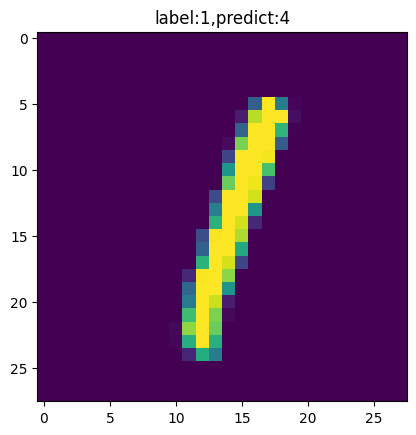

In [ ]:
epoch = 5
x_input = torch.tensor(datasets_test[0][epoch],
                       dtype=torch.float,
                       requires_grad=False)
y_true = torch.tensor(datasets_test[1][epoch],
                      dtype=torch.int,
                      requires_grad=False)
#y_pre1 = model(x_input)
y_pre = torch.argmax(model(x_input))
#print(y_true, y_pre1, y_pre2)
image = datasets_test[0][epoch].reshape(28, 28)
plt.imshow(image)
plt.title('label:{},predict:{}'.format(int(y_true), y_pre))
plt.show()